<a href="https://colab.research.google.com/github/Gauravds435/colabtools/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
for fn in uploaded.keys():
  print("User uploaded file'{name}' with length {length} bytes".format(name = fn, length=len(uploaded[fn])))

User uploaded file'Salary_Data.csv' with length 454 bytes


In [ ]:
uploaded

{'Salary_Data.csv': b'YearsExperience,Salary\r\n1.1,39343.00\r\n1.3,46205.00\r\n1.5,37731.00\r\n2.0,43525.00\r\n2.2,39891.00\r\n2.9,56642.00\r\n3.0,60150.00\r\n3.2,54445.00\r\n3.2,64445.00\r\n3.7,57189.00\r\n3.9,63218.00\r\n4.0,55794.00\r\n4.0,56957.00\r\n4.1,57081.00\r\n4.5,61111.00\r\n4.9,67938.00\r\n5.1,66029.00\r\n5.3,83088.00\r\n5.9,81363.00\r\n6.0,93940.00\r\n6.8,91738.00\r\n7.1,98273.00\r\n7.9,101302.00\r\n8.2,113812.00\r\n8.7,109431.00\r\n9.0,105582.00\r\n9.5,116969.00\r\n9.6,112635.00\r\n10.3,122391.00\r\n10.5,121872.00\r\n'}

In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded["Salary_Data.csv"].decode("utf-8")))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


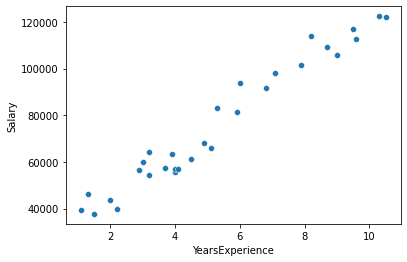

In [ ]:
X = df["YearsExperience"]
Y = df["Salary"]
sns.scatterplot(X, Y)

In [ ]:
# Gradient descent method
beta0 = 0
beta1 = 0
alpha = 0.01
count = 10000
n = float(len(X))

In [ ]:
for i in range(count):
  Ybar = beta1*X + beta0
  beta1 = beta1 - (alpha/n)*sum(X*(Ybar-Y))
  beta0 = beta0 - (alpha/n)*sum(Ybar-Y)

print(beta0,beta1)

25792.20018347487 9449.962323709777


<function matplotlib.pyplot.show>

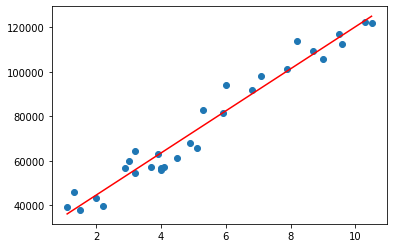

In [ ]:
Ybar = beta1*X + beta0
plt.scatter(X, Y)
plt.plot([min(X), max(X)],[min(Ybar), max(Ybar)], color = "red")
plt.show

In [ ]:
import statsmodels.api as sm 
salary=df["Salary"]
ye = sm.add_constant(df[["YearsExperience"]])
ye

In [ ]:
mod = sm.OLS(salary, ye)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.14e-20
Time:                        14:54:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

In [ ]:
def RSE(y_true, y_predicted):
  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS = np.sum(np.square(y_true-y_predicted))
  rse = math.sqrt(RSS / (len(y_true) - 2))
  return rse

In [ ]:
rse = RSE(df["Salary"], results.predict())
print(rse)

5788.315051119395


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(df["YearsExperience"]).reshape(-1, 1)
y = np.array(df["Salary"]).reshape(-1, 1)
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)
yp = lr.predict(x)
rse = RSE(y, yp)
print(rse)

[[9449.96232146]]
[25792.20019867]
5788.315051119394
